<img src="intro.png" alt="intro" style="width: 500px;"/>

[Luke Conibear](https://www.lukeconibear.com/) | l.a.conibear@leeds.ac.uk  

### Contents
- [Python](#Python)
- [Hang on, don't optimise too early](#Hang-on,-don't-optimise-too-early)
- [How fast is it?](#How-fast-is-it?)
- [How fast could it go?](#How-fast-could-it-go?)
- [Potential improvements](#Potential-improvements)
  - [Append to lists, rather than concatenating](#Append-to-lists,-rather-than-concatenating)
  - [Move loop-invariants outside loops](#Move-loop-invariants-outside-loops)
  - [Use built-in functions](#Use-built-in-functions)
  - [Use optimal data types](#Use-optimal-data-types)
  - [Reduce repeated calculations with caching](#Reduce-repeated-calculations-with-caching)
  - [Use vectorisation instead of loops](#Use-vectorisation-instead-of-loops)
  - [Algorithm improvements](#Algorithm-improvements)
  - [Compilers](#Compilers)
  - [Lazy loading and execution](#Lazy-loading-and-execution)
  - [Parallelisation](#Parallelisation)
    - [Single machine](#Single-machine)
    - [Multi-threading](#Multi-threading)
    - [Multi-processing](#Multi-processing)
    - [Interactive on HPC](#Interactive-on-HPC)
    - [HPC](#HPC)
    - [Profile parallel code](#Profile-parallel-code)
    - [Suitable data types for parallel computing](#Suitable-data-types-for-parallel-computing)
  - [GPUs](#GPUs)
- [Recommendations](#Recommendations)
- [Further information](#Further-information)

### Python
- High−level.
- Clean, readable, and efficient.
- Easy and fun to learn.
- Dynamic.
- Fast to write and test code.
- Less code.
- Flexible.
- Interactive.
- Great support
- Open source.
- Vast range of libraries.
- Huge number of users.
- Slow (sometimes, [more later](#Compilers)).

### Hang on, don't optimise too early
- Trade-offs e.g. complexity, speed, memory, disk, readability, time, effort, etc.
1. Check that code is correct (tested, documented).
2. Is optimisation needed?
3. If yes, optimise code and data.
4. If more needed, parallelise.
*Plot idea from [Dask-ML](https://ml.dask.org/).*

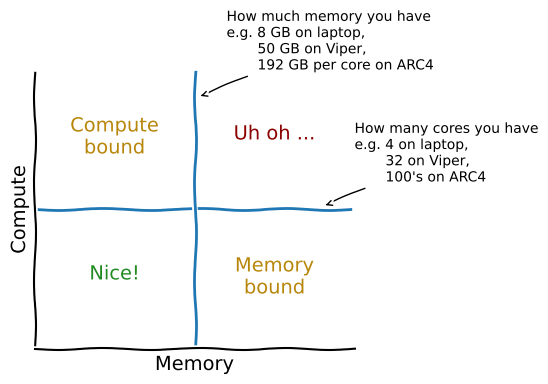

In [106]:
import matplotlib.pyplot as plt
import numpy as np

with plt.xkcd():
    fig = plt.figure(figsize=(4, 4), dpi=100)
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([0, 1])
    ax.set_xlim([0, 1])
    plt.axhline(y=0.5, linestyle='-')
    plt.axvline(x=0.5, linestyle='-')
    ax.annotate('Compute\nbound', xy=(0.25, 0.7), ha='center', color='darkgoldenrod')
    ax.annotate('Memory\nbound', xy=(0.75, 0.2), ha='center', color='darkgoldenrod')
    ax.annotate('Nice!', xy=(0.25, 0.25), ha='center', color='forestgreen')
    ax.annotate('Uh oh ...', xy=(0.75, 0.75), ha='center', color='darkred')
    ax.annotate(
        "How many cores you have\ne.g. 4 on laptop,\n       32 on Viper,\n       100's on ARC4",
        arrowprops=dict(arrowstyle='->'),
        xy=(0.9, 0.51),
        xytext=(1, 0.6),
        fontsize=10
    )
    ax.annotate(
        "How much memory you have\ne.g. 8 GB on laptop,\n       50 GB on Viper,\n       192 GB per core on ARC4",
        arrowprops=dict(arrowstyle='->'),
        xy=(0.51, 0.9),
        xytext=(0.6, 1),
        fontsize=10
    )
    ax.set_xlabel('Memory')
    ax.set_ylabel('Compute')
    plt.show()

### How fast is it?
- [Profiling](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html) (i.e. find the bottlenecks)
  - [Speed](https://github.com/pyutils/line_profiler)
    - [IPython magic](https://jakevdp.github.io/PythonDataScienceHandbook/01.03-magic-commands.html) (Jupyter Lab)
      - Line: `%timeit`
      - Cell: `%%timeit`
      - If `pip install line_profiler`:
        - First load module: `%load_ext line_profiler`
        - Scripts: `%prun`
        - Line-by-line: `%lprun`
          - `@profile` decorator around the function
  - [Memory](https://github.com/pythonprofilers/memory_profiler)
    - If `pip install memory_profiler`:
    - First load module:
      - `%load_ext memory_profiler`
      - Line: `%memit`
      - Cell: `%%memit`
      - Line-by-line: `%mprun`
- [Profile parallel code](#Profile-parallel-code)

### How fast could it go?
- Time-space complexity
  - [Big O notation](https://www.bigocheatsheet.com/) where O is the order of operations, O(...).
  - Ignores constants and takes the largest order, so O(2n<sup>2</sup> + 3n) would be O(n<sup>2</sup>).
  - Important for large number of elements, N.
  - Typical case.
  - Constant time means per machine operation.
  
*Plot idea from [Big O Cheat Sheet](https://www.bigocheatsheet.com/)*

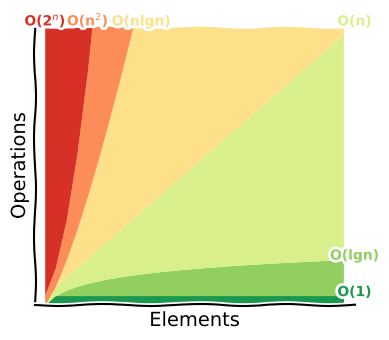

In [4]:
max_value = 30
elements = np.arange(1, max_value)

with plt.xkcd():
    fig = plt.figure(figsize=(4, 4), dpi=100)
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([0, max_value])
    ax.set_xlim([0, max_value])
    ax.set_xlabel('Elements')
    ax.set_ylabel('Operations')
    
    complexities = ['O(1)', 'O(lgn)', 'O(n)', 'O(nlgn)', 'O(n$^2$)', 'O(2$^n$)']
    colours = list(reversed(['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850']))
    x_values = [max_value, max_value, max_value, max_value / 3, max_value / 6, max_value / max_value]
    y_values = [max_value / max_value, np.log2(max_value), max_value, max_value, max_value, max_value]
    y_lows = [0, 1, np.log2(elements), elements, elements * np.log2(elements), elements ** 2]
    y_highs = [1, np.log2(elements), elements, elements * np.log2(elements), elements ** 2, max_value]
    
    for index, complexity in enumerate(complexities):
        plt.fill_between(elements, y_lows[index], y_highs[index], facecolor=colours[index])
        ax.annotate(complexity, xy=(x_values[index], y_values[index]), ha='center', color=colours[index], fontsize=10, weight='bold')
    
    plt.show()

### Potential improvements

#### Append to lists, rather than concatenating
- *Lists are allocated twice the memory required, so appending fills this up in O(1) (long-term average), while concatenating creates a new list each time in O(n).*

In [5]:
%%timeit
my_list = []
for num in range(1_000):
    my_list += [num] # time O(n)

46.5 µs ± 76.3 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
%%timeit
my_list = []
for num in range(1_000):
    my_list.append(num) # time O(1)

35.6 µs ± 130 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#### Move loop-invariants outside loops

In [7]:
%%timeit
for num in range(1_000_000):
    constant = 500_000
    bigger_num = max(num, constant)

124 ms ± 462 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
%%timeit
constant = 500_000
for num in range(1_000_000):
    bigger_num = max(num, constant)

115 ms ± 196 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Use [built-in functions](https://docs.python.org/3/library/functions.html)
- *Optimised in [C](https://en.wikipedia.org/wiki/C_(programming_language) (statically typed and compiled).*

In [9]:
nums = [num for num in range(1_000_000)]

In [10]:
%%timeit
count = 0
for num in nums: # time O(n)
    count += 1

23.8 ms ± 920 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
%timeit len(nums) # time O(1)

42.7 ns ± 2.1 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


#### Use optimal [data types](https://docs.python.org/3/library/datatypes.html)
- [Common](https://docs.python.org/3/tutorial/datastructures.html) and [additional data structures](https://docs.python.org/3/library/collections.html).
- e.g. [dictionaries](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) are fast to search, O(1).  

*Example from Luciano Ramalho, [Fluent Python, Clear, Concise, and Effective Programming](https://www.oreilly.com/library/view/fluent-python/9781491946237/), 2015. O'Reilly Media, Inc.*

In [13]:
haystack_list = np.random.uniform(low=0, high=100, size=(1_000_000))

haystack_dict = {key: value for key, value in enumerate(haystack_list)}

needles = [0.1, 50.1, 99.1]

In [14]:
%%timeit
needles_found = 0
for needle in needles:
    if needle in haystack_list: # time O(n) within list
        needles_found += 1

602 µs ± 13.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
%%timeit
needles_found = 0
for needle in needles:
    if needle in haystack_dict: # time O(1) within dict
        needles_found += 1

138 ns ± 0.213 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


- Many more [examples](https://www.bigocheatsheet.com/) e.g.:
  - Generators save memory by yielding only the next iteration.
  - Memory usage for floats/integers of 16 bit < 32 bit < 64 bit.
  - For NetCDFs, using [`engine='h5netcdf'`](https://github.com/shoyer/h5netcdf) with `xarray` can be faster, over than the default [`engine='netcdf4'`](https://github.com/Unidata/netcdf4-python).  
  - *[Compression](https://youtu.be/8pFnrr0NnwY)*: If arrays are mostly 0, then can save memory using [sparse arrays](https://sparse.pydata.org/en/stable/quickstart.html).
  - *[Chunking](https://youtu.be/8pFnrr0NnwY)*: If need all data, then can load/process in chunks to reduce amount in memory: [Zarr](https://zarr.readthedocs.io/en/stable/) for arrays, [Pandas](https://pythonspeed.com/articles/chunking-pandas/).
  - *[Indexing](https://youtu.be/8pFnrr0NnwY)*: If need a subset of the data, then can index (multi-index) to reduce memory and increase speed for queries: [Pandas](https://pythonspeed.com/articles/indexing-pandas-sqlite/), [SQLite](https://docs.python.org/3/library/sqlite3.html).

#### Reduce repeated calculations with [caching](https://realpython.com/lru-cache-python/)
- e.g. [Fibonacci sequence](https://en.wikipedia.org/wiki/Fibonacci_number) (each number is the sum of the two preceding ones starting from 0 and 1 e.g. 0, 1, 1, 2, 3, 5, 8, 13, 21, 34).

In [16]:
def fibonacci(n): # time O(2^n) as 2 calls to the function n times (a balanced tree of repeated calls)
    if n == 0 or n == 1:
        return 0
    elif n == 2:
        return 1
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)

In [17]:
%timeit fibonacci(20)

1.04 ms ± 6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [18]:
def fibonacci_with_caching(n, cache={0: 0, 1: 0, 2: 1}): # time O(n) as 1 call per n
    if n in cache:
        return cache[n]
    else:
        cache[n] = fibonacci_with_caching(n - 1, cache) + fibonacci_with_caching(n - 2, cache)
        return cache[n]

In [19]:
%timeit fibonacci_with_caching(20, cache={0: 0, 1: 0, 2: 1})

4.23 µs ± 60.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### Use [vectorisation](https://jakevdp.github.io/PythonDataScienceHandbook/02.03-computation-on-arrays-ufuncs.html) instead of loops
- Loops are slow in Python ([CPython](https://www.python.org/), default interpreter).
  - *Because loops type−check and dispatch functions per cycle.*
- [Vectors](https://en.wikipedia.org/wiki/Automatic_vectorization) can work on many parts of the problem at once.
- NumPy [ufuncs](https://numpy.org/doc/stable/reference/ufuncs.html) (universal functions).
  - *Optimised in C (statically typed and compiled).*
  - [Arbitrary Python function to NumPy ufunc](https://numpy.org/doc/stable/reference/generated/numpy.frompyfunc.html).

In [20]:
nums = np.arange(1_000_000)

In [21]:
%%timeit
for num in nums:
    num *= 2

274 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%%timeit
double_nums = np.multiply(nums, 2)

617 µs ± 41 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


- [Broadcasting](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html) (ufuncs over different shaped arrays, [NumPy](https://numpy.org/doc/stable/user/basics.broadcasting.html), [xarray](https://xarray.pydata.org/en/v0.16.2/computation.html?highlight=Broadcasting#broadcasting-by-dimension-name)).

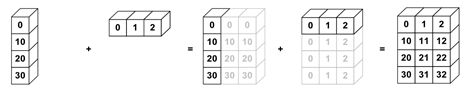  

*[Image source](https://mathematica.stackexchange.com/questions/99171/how-to-implement-the-general-array-broadcasting-method-from-numpy)*

In [23]:
nums_col = np.array([0, 10, 20, 30]).reshape(4, 1)
nums_row = np.array([0, 1, 2])

nums_col + nums_row

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [24]:
import xarray as xr

nums_col = xr.DataArray([0, 10, 20, 30], [('col', [0, 10, 20, 30])])
nums_row = xr.DataArray([0, 1, 2], [('row', [0, 1, 2])])

nums_col + nums_row

<xarray.DataArray (col: 4, row: 3)>
array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])
Coordinates:
  * col      (col) int64 0 10 20 30
  * row      (row) int64 0 1 2

#### Algorithm improvements
- The instructions to solve the problem.
  - Free MIT course on '*Introduction to algorithms*', [video lectures](https://youtube.com/playlist?list=PLUl4u3cNGP61Oq3tWYp6V_F-5jb5L2iHb).
- Many existing libraries are already optimised (computationally and algorithmically).
  - [Minimal examples of data structures and algorithms in Python](https://github.com/keon/algorithms).
  - e.g. [Find multiple strings in a text](https://pythonspeed.com/articles/do-you-need-cluster-or-multiprocessing/).
    - [Aho-Corasick algorithm](https://github.com/WojciechMula/pyahocorasick), 25x faster than using regex naively.

#### [Compilers](https://youtu.be/I4nkgJdVZFA)
- [CPython](https://www.python.org/)
  - *Ahead-Of-Time (AOT) compiler.*
    - Statically compiled C extensions.
  - General purpose interpreter.
    - Can work on a variety of problems.
  - Dynamically typed.
    - Types can change e.g. `x = 5`, then later `x = 'gary'`.
- [PyPy](https://www.pypy.org/)
  - *Just−In−Time (JIT) compiler (written in Python).*
    - Enables optimisations at run time, especially for numerical tasks with repitition and loops.
    - Replaces CPython.
    - Faster, though overheads for start-up and memory.
- [Numba](http://numba.pydata.org/)
  - *Uses JIT compiler on functions.*
    - Converts to fast machine code (LLVM).
    - Uses decorators around functions.
    - Use with the default CPython.
    - Examples for [NumPy](https://numba.pydata.org/numba-doc/dev/reference/numpysupported.html) and [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/enhancingperf.html#using-numba).

In [29]:
from numba import njit

nums = np.arange(1_000_000)

In [30]:
def super_function(nums):
    trace = 0.0
    for num in nums: # loop
        trace += np.cos(num) # numpy
    return nums + trace # broadcasting

In [31]:
%timeit super_function(nums)

1.68 s ± 8.53 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
@njit # numba decorator
def super_function(nums):
    trace = 0.0
    for num in nums: # loop
        trace += np.cos(num) # numpy
    return nums + trace # broadcasting

In [33]:
%timeit super_function(nums)

15 ms ± 46 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


- [Cython](https://cython.org/)
  - *Compiles to statically typed C/C++*.
  - Use for any amount of code.
  - Use with the default CPython.
  - Examples [not using IPython](https://cython.readthedocs.io/en/latest/src/quickstart/build.html#building-a-cython-module-using-setuptools), [NumPy](https://cython.readthedocs.io/en/latest/src/tutorial/numpy.html), [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/enhancingperf.html) (example below).

In [95]:
import pandas as pd

In [97]:
df = pd.DataFrame({
    "a": np.random.randn(1000),
    "b": np.random.randn(1000),
    "N": np.random.randint(100, 1000, (1000)),
    "x": "x",
})
df.head()

,a,b,N,x
0,-1.860311,-0.551809,288,x
1,0.782267,1.564407,653,x
2,-1.243118,-0.414263,472,x
3,0.107798,-1.261014,312,x
4,-0.524740,0.479698,958,x


In [98]:
def f(x):
    return x * (x - 1)
   

def integrate_f(a, b, N):
    s = 0
    dx = (b - a) / N
    for i in range(N):
        s += f(a + i * dx)
        
    return s * dx

In [99]:
%timeit df.apply(lambda x: integrate_f(x["a"], x["b"], x["N"]), axis=1)

73 ms ± 794 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [3]:
%load_ext Cython

In [100]:
%%cython # only change
def f(x):
    return x * (x - 1)
   

def integrate_f(a, b, N):
    s = 0
    dx = (b - a) / N
    for i in range(N):
        s += f(a + i * dx)
        
    return s * dx

In [101]:
%timeit df.apply(lambda x: integrate_f(x["a"], x["b"], x["N"]), axis=1)

51.7 ms ± 729 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [102]:
%%cython
cdef double f(double x) except? -2:                  # adding types
    return x * (x - 1)
   

cpdef double integrate_f(double a, double b, int N): # adding types
    cdef int i                                       # adding types
    cdef double s, dx                                # adding types
    s = 0
    dx = (b - a) / N
    for i in range(N):
        s += f(a + i * dx)
        
    return s * dx

In [103]:
%timeit df.apply(lambda x: integrate_f(x["a"], x["b"], x["N"]), axis=1)

8.96 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### [Lazy loading](https://xarray.pydata.org/en/v0.16.2/dask.html) and [execution](https://tutorial.dask.org/01x_lazy.html)
- Lazily loads metadata only, rather than eagerly loading data into memory.
- Creates task graph of scheduled work awaiting execution (`.compute()`).

In [34]:
xr.tutorial.open_dataset('air_temperature')

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

#### Parallelisation
- Divide a large problem into many smaller ones and solve *simultaneously*.
  - *Divides up the time/space complexity across workers.*
  - Tasks centrally managed by a scheduler.
  - Multi-processing (cores) - useful for compute-bound problems.
  - Multi-threading (parts of processes), useful for memory-bound problems.
    - Threads preemptively controlled by [Global Interpreter Lock, GIL](https://wiki.python.org/moin/GlobalInterpreterLock).
- If need to share memory across chunks
  - Use [shared memory](https://docs.dask.org/en/latest/shared.html) (commonly OpenMP, Open Multi-Processing).
  - `-pe smp np` on ARC4
- Otherwise
  - Use [message passing interface, MPI](https://docs.dask.org/en/latest/setup/hpc.html?highlight=mpi#using-mpi) (commonly OpenMPI).
  - `-pe ie np` on ARC4

##### [Single machine](https://docs.dask.org/en/latest/setup/single-distributed.html)
- [Dask](https://docs.dask.org/en/latest/)
  - Great features.
  - Helpful documentation.
  - Familiar API.
  - Under the hood for many libraries e.g. [xarray](http://xarray.pydata.org/en/stable/dask.html), [iris](https://scitools.org.uk/iris/docs/v2.4.0/userguide/real_and_lazy_data.html), [scikit-learn](https://ml.dask.org/).

In [35]:
from IPython.display import Video

In [36]:
Video('dask_single_machine.mp4')

In [ ]:
from dask.distributed import Client
client = Client()
client

In [ ]:
ds = xr.open_dataset(
    '/nfs/a68/shared/earlacoa/wrfout_2015_PM_2_DRY_0.25deg.nc',
    chunks={'time': 'auto'} # dask chunks
)

In [ ]:
ds.nbytes * (2 ** -30)

In [ ]:
%time ds_mean = ds.mean()

In [ ]:
%time ds_mean.compute()

In [ ]:
ds.close()
client.close()

##### Multi-threading
- e.g. [dask.array](https://examples.dask.org/array.html) (NumPy).

In [37]:
Video('multi-threading.mp4')

In [ ]:
from dask.distributed import Client
client = Client(
    processes=False,
    threads_per_worker=4,
    n_workers=1
)
client

In [ ]:
import dask.array as da

In [ ]:
my_array = da.random.random(
    (50_000, 50_000),
    chunks=(5_000, 5_000) # dask chunks
)
result = my_array + my_array.T
result

In [ ]:
result.compute()

In [ ]:
client.close()

##### Multi-processing
- e.g. [dask.dataframe](https://examples.dask.org/dataframe.html) (Pandas).

In [38]:
Video('multi-processing.mp4')

In [ ]:
from dask.distributed import Client
client = Client()
client

In [ ]:
import dask
import dask.dataframe as dd

In [ ]:
df = dask.datasets.timeseries()
df

In [ ]:
type(df)

In [ ]:
result = df.groupby('name').x.std()
result

In [ ]:
result.visualize()

In [ ]:
result_computed = result.compute()

In [ ]:
type(result_computed)

In [ ]:
client.close()

##### [Interactive on HPC](https://pangeo.io/setup_guides/hpc.html)
- [Setup video](https://youtu.be/FXsgmwpRExM).
  - Create or edit the `~/.config/dask/jobqueue.yaml` file with that in this directory.
  - Also, can check the `~/.config/dask/distributed.yaml` file with that in this directory.
- e.g. [dask.bag](https://examples.dask.org/bag.html)
  - Iterate over a bag of independent objects (embarrassingly parallel).

In [39]:
Video("interactive_on_hpc.mp4")

In [ ]:
# in a terminal

# log onto arc4
ssh ${USER}@arc4.leeds.ac.uk

# start an interactive session on a compute node on arc4
qlogin -l h_rt=04:00:00 -l h_vmem=12G

# activate your python environment
conda activate my_python_environment

# echo back the ssh command to connect to this compute node
echo "ssh -N -L 2222:`hostname`:2222 -L 2727:`hostname`:2727 ${USER}@arc4.leeds.ac.uk"

# launch a jupyter lab session on this compute node
jupyter lab --no-browser --ip=`hostname` --port=2222

In [ ]:
# in a local terminal
# ssh into the compute node
ssh -N -L 2222:`hostname`:2222 -L 2727:`hostname`:2727 ${USER}@arc4.leeds.ac.uk

In [ ]:
# open up a local browser (e.g. chrome)
# go to the jupyter lab session by pasting into the url bar
localhost:2222
    
# can also load the dask dashboard in the browser at localhost:2727

In [ ]:
# now the jupyter code
from dask_jobqueue import SGECluster
from dask.distributed import Client

cluster = Client(
    walltime='01:00:00',
    memory='4 G',
    resource_spec='h_vmem=4G',
    scheduler_options={
        'dashboard_address': ':2727',
    },
)

client = Client(cluster)

In [ ]:
cluster.scale(jobs=20)
#cluster.adapt(minimum=0, maximum=20)

In [ ]:
client

In [ ]:
import numpy as np
import dask.bag as db

In [ ]:
nums = np.random.randint(low=0, high=100, size=(5_000_000))
nums

In [ ]:
def weird_function(nums):
    return chr(nums)

In [ ]:
bag = db.from_sequence(nums)
bag = bag.map(weird_function)
bag.visualize()

In [ ]:
result = bag.compute()

In [ ]:
client.close()
cluster.close()

##### [HPC](https://docs.dask.org/en/latest/setup/hpc.html)
- Non-interactive.
- Create/edit the `dask_on_hpc.py` file.
- Submit to the queue using `qsub dask_on_hpc.bash`.

##### Profile parallel code
- [Example visualisation of profiler](https://docs.dask.org/en/latest/diagnostics-local.html#example).

##### Suitable data types for parallel computing
- [Parquet](https://examples.dask.org/dataframes/01-data-access.html#Write-to-Parquet) creates efficient tabular data (e.g. csv, dataframes), useful for parallel computing.
  - Accessed via [pyarrow](https://arrow.apache.org/docs/python/install.html).
- [Zarr](https://zarr.readthedocs.io/en/stable/) creates compressed, chunked, N-dimensional arrays, designed for use in parallel computing.

#### GPUs
- *GPUs (Graphics Processing Units) are optimised for numerical operations, while CPUs perform general computation.*
- [cuPy](https://cupy.dev/) (NumPy).
```python
import cupy as cp
x = cp.arange(6).reshape(2, 3).astype('f')
x.sum(axis=1)
```
- [cuDF](https://docs.rapids.ai/api/cudf/stable/) (Pandas).
- Can run in [parallel](https://docs.dask.org/en/latest/gpu.html).
  - GPUs available on [ARC4](https://arcdocs.leeds.ac.uk/systems/arc4.html#using-the-v100-gpu-nodes).

### Recommendations
1. Check code is correct and optimisation is needed.
2. Profile to find bottlenecks.
  - Jupyter Lab: `%%timeit` and `%%memit`.
  - Line-by-line: `line_profiler` and `memory_profiler`.
3. Optimise code and data.
  - Data structures.
  - Use existing optimised libraries (algorithms).
  - Vectorisation (instead of loops).
  - Lazy loading and execution.
  - If numerically intensive problem:
    - All code, use [PyPy](https://www.pypy.org/)/[GPUs](https://cupy.dev/).
    - Specific functions, use [Numba](https://numba.pydata.org/).
  - If need static typing, use [Cython](https://cython.org/).
4. Parallelise.
    - Use multi-processing (don't need to worry about GIL).
    - Use [Dask](https://dask.org/) ([Coiled](https://coiled.io/)).

### Further information
*Helpful resources*
- [Why is Python slow?](https://youtu.be/I4nkgJdVZFA), Anthony Shaw, PyCon 2020. [CPython Internals](https://realpython.com/products/cpython-internals-book/).
- Luciano Ramalho, [*Fluent Python, Clear, Concise, and Effective Programming*](https://www.oreilly.com/library/view/fluent-python/9781491946237/), 2015. O'Reilly Media, Inc.
- Jake VanderPlas, [*Python Data Science Handbook*](https://www.oreilly.com/library/view/python-data-science/9781491912126/), 2016. O'Reilly Media, Inc.
- [Pangeo](https://pangeo.io/index.html), [talk](https://youtu.be/2rgD5AJsAbE) - Python libraries that work well together and build on each other, especially for big data geosciences (e.g. [NumPy](https://numpy.org/), [Pandas](https://pandas.pydata.org/), [xarray](http://xarray.pydata.org/en/stable/), [Dask](https://dask.org/), [Numba](https://numba.pydata.org/), [Jupyter](https://jupyter.org/)).
- [Concurrency](https://youtu.be/18B1pznaU1o) can also run different tasks together, but work is not done at the same time.
- [Asynchronous](https://youtu.be/iG6fr81xHKA) (multi-threading), useful for massive scaling, threads controlled explicitly.
- MIT course on '*Introduction to algorithms*', [video lectures](https://youtube.com/playlist?list=PLUl4u3cNGP61Oq3tWYp6V_F-5jb5L2iHb).
- [PythonSpeed.com](https://pythonspeed.com/), Itamar Turner-Trauring
- [Writing faster Python](https://youtu.be/YjHsOrOOSuI), Sebastian Witowski, Euro Python 2016
- [AlgoExpert](https://www.algoexpert.io/product)

*Other things that may help save time in the long run:*
- [Meaningful naming](https://learning.oreilly.com/library/view/clean-code-a/9780136083238/chapter02.html#ch2).
- [Readable code](https://youtu.be/esZLCuWs_2Y).
- [Simplify code](https://youtu.be/dqdsNoApJ80).
- [Small functions that do one thing](https://learning.oreilly.com/library/view/clean-code-a/9780136083238/chapter03.html#ch3).
- [Comments for why (if at all), not what](https://learning.oreilly.com/library/view/clean-code-a/9780136083238/chapter04.html#ch4).
